In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
participant_data_path = './EEG/number'
processed_data_path = './EEG/processed_data'

In [86]:
ps = os.listdir(participant_data_path)
participants=[]
for p in ps:
    p= p[:3]
    if p not in participants:
        participants.append(p)
        
# participants, len(participants)

In [15]:
data_dict= {}
for participant in participants:
#     participant= participants[0]

    mat= loadmat(os.path.join(participant_data_path,f"{participant}_{options[opt]}_number_correct.mat"))

    correct_instances_ts_ch= np.transpose(mat['data_corr'], axes=[2,1,0])
    correct_classes= np.array([0] * correct_instances_ts_ch.shape[0])


    mat= loadmat(os.path.join(participant_data_path,f"{participant}_{options[opt]}_number_error.mat"))

    error_instances_ts_ch= np.transpose(mat['data_err'], axes=[2,1,0])
    error_classes= np.array([1] * error_instances_ts_ch.shape[0])

    instances= np.concatenate([error_instances_ts_ch, correct_instances_ts_ch])
    classes= np.concatenate([error_classes, correct_classes])

    data_dict[participant]= (instances, classes)

In [6]:
if not os.path.exists(processed_data_path):
    os.makedirs(processed_data_path)
    
pickle.dump(data_dict,open(os.path.join(processed_data_path, f"data_dictionary-{participant_data_path.split('/')[-1]}.pkl"),"wb"))


## Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scaling_participant(dictionary, scaler="MinMaxScaler"):
    """
    scaling for each participant based on the participant's data from each channel
    """
    
    dictionary_scaled={}
    for participant in participants:
        X, y= dictionary[participant]
        channels=[]

        if scaler=="MinMaxScaler":
            for i in range(X.shape[2]):
                channels.append(MinMaxScaler().fit_transform(X[:,:,i]))
        elif scaler=="StandardScaler":
            for i in range(X.shape[2]):
                channels.append(StandardScaler().fit_transform(X[:,:,i]))
                
        dictionary_scaled[participant]= (np.transpose(channels, axes=[1,2,0]), y)
    
    return dictionary_scaled
            
def scaling_all(dictionary, scaler="MinMaxScaler", n_channels=32):
    """
    scaling for each participant based on all the data from each channel
    """
    channel_scaler=[]
    for i in range(n_channels):
        if scaler=="MinMaxScaler":
            channel_scaler.append(MinMaxScaler())
        elif scaler=='StandardScaler':
            channel_scaler.append(StandardScaler())
    for participant in participants:
        X, y= dictionary[participant]
        for i in range(X.shape[2]):
            channel_scaler[i].fit(X[:,:,i])
            
    dictionary_scaled={}
    for participant in participants:
        X, y= dictionary[participant]
        channels=[]
        
        for i in range(X.shape[2]):
    #         channels.append(X[:,:,i])
            channels.append(channel_scaler[i].transform(X[:,:,i]))

        dictionary_scaled[participant]= ( np.transpose(channels, axes=[1,2,0]), y)

    return dictionary_scaled

# data_dict_scaled_p= scaling_participant(data_dict)
# data_dict_scaled_a= scaling_all(data_dict)
# if not os.path.exists(os.path.join(processed_data_path, "minmax_scaled")):
#     os.makedirs(os.path.join(processed_data_path, "minmax_scaled"))

data_dict_scaled_p= scaling_participant(data_dict, scaler='StandardScaler')
# data_dict_scaled_a= scaling_all(data_dict, scaler='StandardScaler')

if not os.path.exists(os.path.join(processed_data_path, "standard_scaled")):
    os.makedirs(os.path.join(processed_data_path, "standard_scaled"))
pickle.dump(data_dict_scaled_p,open(os.path.join(processed_data_path, "standard_scaled", f"data_scaled_p_dictionary-{participant_data_path.split('/')[-1]}.pkl"),"wb"))

### Visualise

In [36]:
start=-0.5
step=1.5/(188-1)
timestep_labels=[]
for i in range(188):
    timestep_labels.append(round(start+step*i,3))
    
timestep_labels

[-0.5,
 -0.492,
 -0.484,
 -0.476,
 -0.468,
 -0.46,
 -0.452,
 -0.444,
 -0.436,
 -0.428,
 -0.42,
 -0.412,
 -0.404,
 -0.396,
 -0.388,
 -0.38,
 -0.372,
 -0.364,
 -0.356,
 -0.348,
 -0.34,
 -0.332,
 -0.324,
 -0.316,
 -0.307,
 -0.299,
 -0.291,
 -0.283,
 -0.275,
 -0.267,
 -0.259,
 -0.251,
 -0.243,
 -0.235,
 -0.227,
 -0.219,
 -0.211,
 -0.203,
 -0.195,
 -0.187,
 -0.179,
 -0.171,
 -0.163,
 -0.155,
 -0.147,
 -0.139,
 -0.131,
 -0.123,
 -0.115,
 -0.107,
 -0.099,
 -0.091,
 -0.083,
 -0.075,
 -0.067,
 -0.059,
 -0.051,
 -0.043,
 -0.035,
 -0.027,
 -0.019,
 -0.011,
 -0.003,
 0.005,
 0.013,
 0.021,
 0.029,
 0.037,
 0.045,
 0.053,
 0.061,
 0.07,
 0.078,
 0.086,
 0.094,
 0.102,
 0.11,
 0.118,
 0.126,
 0.134,
 0.142,
 0.15,
 0.158,
 0.166,
 0.174,
 0.182,
 0.19,
 0.198,
 0.206,
 0.214,
 0.222,
 0.23,
 0.238,
 0.246,
 0.254,
 0.262,
 0.27,
 0.278,
 0.286,
 0.294,
 0.302,
 0.31,
 0.318,
 0.326,
 0.334,
 0.342,
 0.35,
 0.358,
 0.366,
 0.374,
 0.382,
 0.39,
 0.398,
 0.406,
 0.414,
 0.422,
 0.43,
 0.439,
 0.447,
 

In [63]:
participants_correct_erps=[]
participants_error_erps=[]
for participant in participants:
#     participant= participants[0]

    mat= loadmat(os.path.join(participant_data_path,f"{participant}_{options[opt]}_number_correct.mat"))
    
    correct_erp= np.transpose(mat['erp_corr'], [1,0])
    participant_erp_correct_dict= {
        "Amplitude": correct_erp.mean(1),
        "Participant": [participant]*188,
        "Timestep":timestep_labels,
        "Class":"Congruent"
    }
    participants_correct_erps.append(participant_erp_correct_dict)


    mat= loadmat(os.path.join(participant_data_path,f"{participant}_{options[opt]}_number_error.mat"))

    error_erp= np.transpose(mat['erp_err'], [1,0])
    participant_erp_error_dict= {
        "Amplitude": error_erp.mean(1),
        "Participant": [participant]*188,
        "Timestep":timestep_labels,
        "Class":"Incongruent"
    }
    participants_error_erps.append(participant_erp_error_dict)


Text(0.5, 1.0, 'Average ERPs across participants')

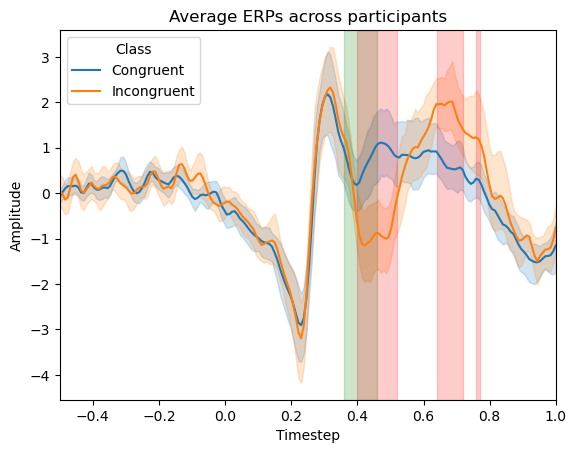

In [85]:
import seaborn as sns
sns.lineplot(pd.concat([pd.DataFrame(d) for d in participants_correct_erps+participants_error_erps]), x="Timestep", y="Amplitude", hue="Class")
plt.axvspan(0.36,0.46, color="green", alpha=0.2)
plt.axvspan(0.4,0.52, color="red", alpha=0.2)
plt.axvspan(0.64,0.72, color="red", alpha=0.2)
plt.axvspan(0.76,0.77, color="red", alpha=0.2)
plt.margins(x=0)
plt.title("Average ERPs across participants")